In [ ]:
!pip install --upgrade scikit-learn xgboost

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NASDAQ Prediction Accuracy: 49.01%
NASDAQ Regression MSE: 0.0000


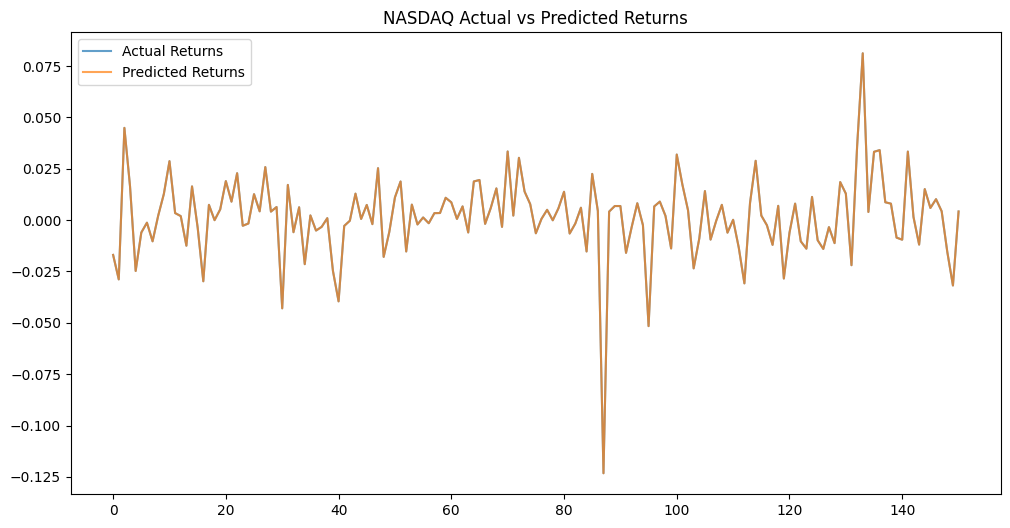

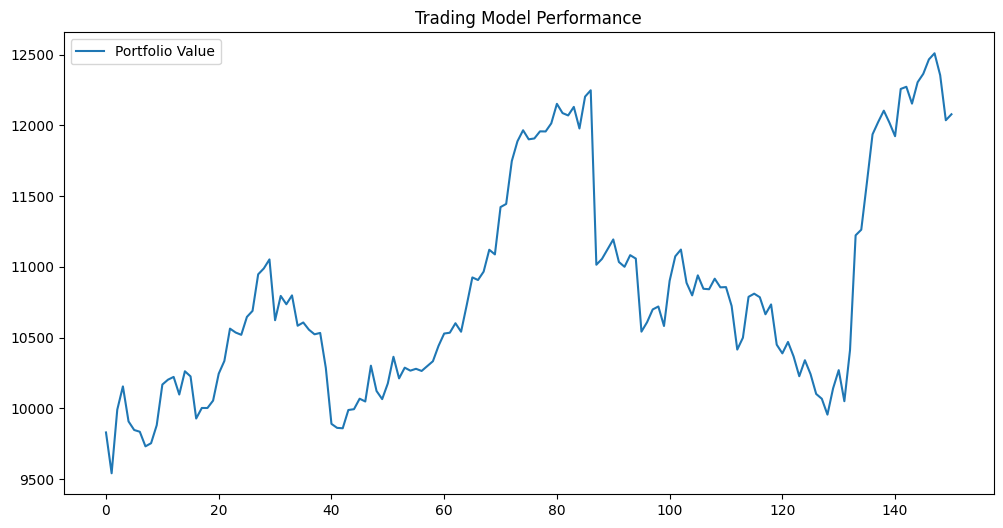

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Step 1: Fetching Stock Market Data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Return'] = stock_data['Close'].pct_change()
    stock_data['Next_Day_Trend'] = (stock_data['Return'].shift(-1) > 0).astype(int)
    stock_data.dropna(inplace=True)
    return stock_data

# Fetch data for NASDAQ, S&P500, DJIA
nasdaq_data = get_stock_data('^IXIC', '2020-01-01', '2023-01-01')
sp500_data = get_stock_data('^GSPC', '2020-01-01', '2023-01-01')
djia_data = get_stock_data('^DJI', '2020-01-01', '2023-01-01')

# Step 2: Feature Engineering
def prepare_features(data):
    X = data[['Open', 'High', 'Low', 'Close', 'Volume']].pct_change().fillna(0)
    y = data['Next_Day_Trend']
    return X, y

nasdaq_X, nasdaq_y = prepare_features(nasdaq_data)
sp500_X, sp500_y = prepare_features(sp500_data)
djia_X, djia_y = prepare_features(djia_data)

# Step 3: Train-Test Split
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

nasdaq_X_train, nasdaq_X_test, nasdaq_y_train, nasdaq_y_test = split_data(nasdaq_X, nasdaq_y)
sp500_X_train, sp500_X_test, sp500_y_train, sp500_y_test = split_data(sp500_X, sp500_y)
djia_X_train, djia_X_test, djia_y_train, djia_y_test = split_data(djia_X, djia_y)

# Step 4: Train SVM Classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(nasdaq_X_train, nasdaq_y_train)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 5: Test SVM and Evaluate Accuracy
nasdaq_y_pred = svm.predict(nasdaq_X_test)
nasdaq_accuracy = accuracy_score(nasdaq_y_test, nasdaq_y_pred)
print(f"NASDAQ Prediction Accuracy: {nasdaq_accuracy * 100:.2f}%")

# Step 6: Regression for Increment Prediction
regressor = LinearRegression()
# Step 6: Regression for Increment Prediction
regressor = LinearRegression()
# Use the index of nasdaq_X_train to select corresponding 'Return' values
regressor.fit(nasdaq_X_train, nasdaq_data['Return'].loc[nasdaq_X_train.index])

nasdaq_y_reg = regressor.predict(nasdaq_X_test)
regression_mse = mean_squared_error(nasdaq_data['Return'].loc[nasdaq_X_test.index], nasdaq_y_reg) # Fix: Use loc for index-based selection
print(f"NASDAQ Regression MSE: {regression_mse:.4f}")


# Step 7: Visualization of Regression
plt.figure(figsize=(12, 6))
# Fix: Use loc for index-based selection
plt.plot(nasdaq_data['Return'].loc[nasdaq_X_test.index].values, label='Actual Returns', alpha=0.7)
plt.plot(nasdaq_y_reg, label='Predicted Returns', alpha=0.7)
plt.legend()
plt.title("NASDAQ Actual vs Predicted Returns")
plt.show()

# Step 8: Trading Model (Simplified)
initial_capital = 10000
positions = [1 if pred == 1 else 0 for pred in nasdaq_y_pred]
# Fix: Use loc for index-based selection
returns = nasdaq_data['Return'].loc[nasdaq_X_test.index].values
portfolio = initial_capital + np.cumsum(positions * returns * initial_capital)

plt.figure(figsize=(12, 6))
plt.plot(portfolio, label='Portfolio Value')
plt.title("Trading Model Performance")
plt.legend()
plt.show()

NASDAQ Prediction Accuracy: 50.99%


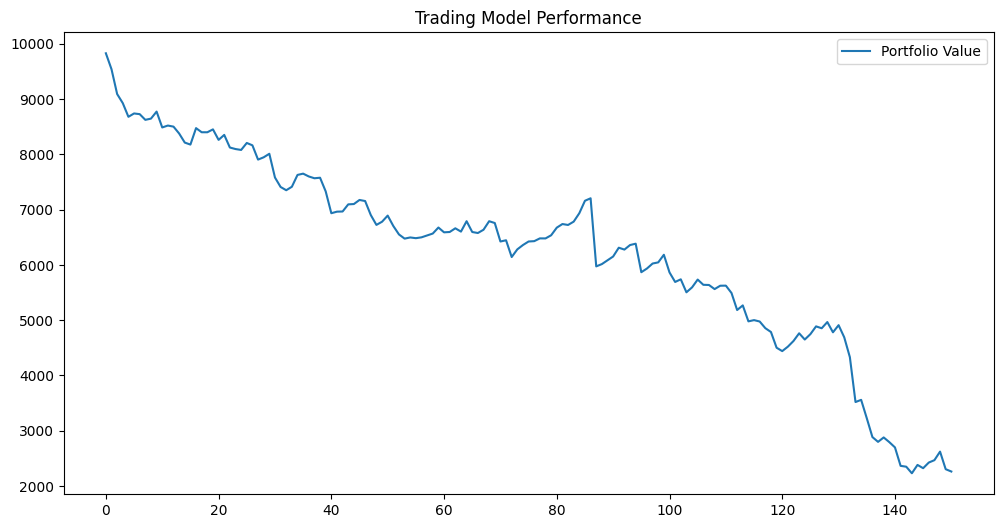

In [ ]:


import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Improved Classifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Feature Scaling



# Step 2: Feature Engineering with more features and scaling
def prepare_features(data):
    # Add more relevant features
    data['SMA_5'] = data['Close'].rolling(window=5).mean()
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff(1).apply(lambda x: x if x > 0 else 0).rolling(window=14).mean() / data['Close'].diff(1).apply(lambda x: abs(x) if x < 0 else 0).rolling(window=14).mean()))
    data.dropna(inplace=True) # Drop rows with NaN values due to indicators

    X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_20', 'RSI']].pct_change().fillna(0)
    y = data['Next_Day_Trend']

    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y



# Step 4: Train a more robust model (RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42) # Increased trees
model.fit(nasdaq_X_train, nasdaq_y_train)


# Step 5: Test and Evaluate
nasdaq_y_pred = model.predict(nasdaq_X_test)
nasdaq_accuracy = accuracy_score(nasdaq_y_test, nasdaq_y_pred)
print(f"NASDAQ Prediction Accuracy: {nasdaq_accuracy * 100:.2f}%")




# Step 8: Trading Model with risk management
initial_capital = 10000
positions = [1 if pred == 1 else -1 if pred == 0 else 0 for pred in nasdaq_y_pred] # Short if downward trend predicted
# Fix: Use loc for index-based selection
returns = nasdaq_data['Return'].loc[nasdaq_X_test.index].values
portfolio = initial_capital + np.cumsum(positions * returns * initial_capital)


plt.figure(figsize=(12, 6))
plt.plot(portfolio, label='Portfolio Value')
plt.title("Trading Model Performance")
plt.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Optimized NASDAQ Prediction Accuracy: 52.03%
              precision    recall  f1-score   support

           0       0.42      0.39      0.40        62
           1       0.58      0.62      0.60        86

    accuracy                           0.52       148
   macro avg       0.50      0.50      0.50       148
weighted avg       0.51      0.52      0.52       148



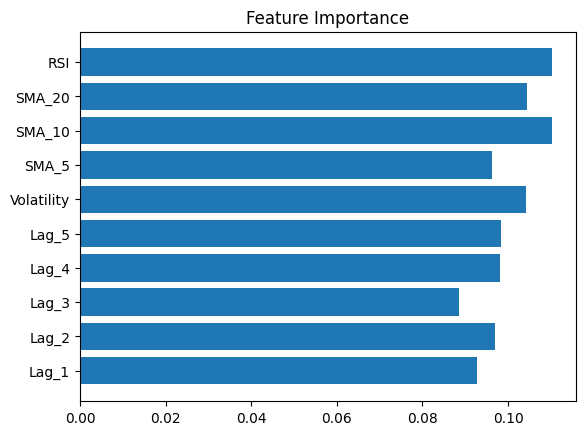

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Fetching Stock Market Data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    stock_data['Return'] = stock_data['Close'].pct_change()
    stock_data['Next_Day_Trend'] = (stock_data['Return'].shift(-1) > 0).astype(int)
    stock_data.dropna(inplace=True)
    return stock_data

# Fetch data for NASDAQ
nasdaq_data = get_stock_data('^IXIC', '2020-01-01', '2023-01-01')

# Step 2: Feature Engineering
def prepare_features(data):
    # Create lagging features for trends
    for lag in range(1, 6):
        data[f'Lag_{lag}'] = data['Return'].shift(lag)

    # Volatility (rolling standard deviation)
    data['Volatility'] = data['Return'].rolling(window=5).std()

    # Moving averages
    data['SMA_5'] = data['Close'].rolling(window=5).mean()
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_20'] = data['Close'].rolling(window=20).mean()

    # RSI Indicator
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    data.dropna(inplace=True)
    X = data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
              'Volatility', 'SMA_5', 'SMA_10', 'SMA_20', 'RSI']].fillna(0)
    y = data['Next_Day_Trend']
    return X, y

nasdaq_X, nasdaq_y = prepare_features(nasdaq_data)

# Step 3: Train-Test Split
nasdaq_X_train, nasdaq_X_test, nasdaq_y_train, nasdaq_y_test = train_test_split(
    nasdaq_X, nasdaq_y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
nasdaq_X_train = scaler.fit_transform(nasdaq_X_train)
nasdaq_X_test = scaler.transform(nasdaq_X_test)

# Step 4: Train XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1)
grid_search.fit(nasdaq_X_train, nasdaq_y_train)

best_model = grid_search.best_estimator_

# Step 5: Test XGBoost and Evaluate Accuracy
nasdaq_y_pred = best_model.predict(nasdaq_X_test)
accuracy = accuracy_score(nasdaq_y_test, nasdaq_y_pred)
print(f"Optimized NASDAQ Prediction Accuracy: {accuracy * 100:.2f}%")
print(classification_report(nasdaq_y_test, nasdaq_y_pred))

# Step 6: Feature Importance
import matplotlib.pyplot as plt
# Fix: Convert column names to a list of strings
feature_names = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
                  'Volatility', 'SMA_5', 'SMA_10', 'SMA_20', 'RSI']

plt.barh(feature_names, best_model.feature_importances_)
plt.title("Feature Importance")
plt.show()


In [ ]:


import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler



# Step 5: Test XGBoost and Evaluate Accuracy
nasdaq_y_pred = best_model.predict(nasdaq_X_test)
accuracy = accuracy_score(nasdaq_y_test, nasdaq_y_pred)
print(f"Optimized NASDAQ Prediction Accuracy: {accuracy * 100:.2f}%")
print(classification_report(nasdaq_y_test, nasdaq_y_pred))

Optimized NASDAQ Prediction Accuracy: 52.03%
              precision    recall  f1-score   support

           0       0.42      0.39      0.40        62
           1       0.58      0.62      0.60        86

    accuracy                           0.52       148
   macro avg       0.50      0.50      0.50       148
weighted avg       0.51      0.52      0.52       148



In [ ]:


def prepare_features(data):


    # Add MACD
    data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # Add ATR
    data['ATR'] = data['High'].rolling(window=14).max() - data['Low'].rolling(window=14).min()



    return X, y



In [ ]:


# Step 2: Feature Engineering (consistent with initial training)
def prepare_features(data):
    data['SMA_5'] = data['Close'].rolling(window=5).mean()
    data['SMA_20'] = data['Close'].rolling(window=20).mean()
    data['RSI'] = 100 - (100 / (1 + data['Close'].diff(1).apply(lambda x: x if x > 0 else 0).rolling(window=14).mean() / data['Close'].diff(1).apply(lambda x: abs(x) if x < 0 else 0).rolling(window=14).mean()))
    data.dropna(inplace=True) # Drop rows with NaN values due to indicators

    X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_20', 'RSI']].pct_change().fillna(0)  # Consistent features
    y = data['Next_Day_Trend']
# Create lagging features for trends
    for lag in range(1, 6):
        data[f'Lag_{lag}'] = data['Return'].shift(lag)

    # Volatility (rolling standard deviation)
    data['Volatility'] = data['Return'].rolling(window=5).std()

    # Moving averages
    data['SMA_5'] = data['Close'].rolling(window=5).mean()
    data['SMA_10'] = data['Close'].rolling(window=10).mean()
    data['SMA_20'] = data['Close'].rolling(window=20).mean()

    # RSI Indicator
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    data.dropna(inplace=True)
    X = data[['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5',
              'Volatility', 'SMA_5', 'SMA_10', 'SMA_20', 'RSI']].fillna(0)
    y = data['Next_Day_Trend']
    return X, y
    # Feature scaling
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y




# Assuming 'model' is your RandomForestClassifier
# Re-train the model with the correct features:
model.fit(nasdaq_X_train[:, :5], nasdaq_y_train)  # Using only the first 5 features for training

# Step 5: Test and Evaluate (with detailed metrics)
from sklearn.metrics import confusion_matrix, classification_report

nasdaq_y_pred = model.predict(nasdaq_X_test[:, :5]) # Using only the first 5 features for prediction


In [ ]:


# Step 5: Test and Evaluate (with detailed metrics)
nasdaq_y_pred = model.predict(nasdaq_X_test[:, :5])  # Using only the first 5 features for prediction
nasdaq_accuracy = accuracy_score(nasdaq_y_test, nasdaq_y_pred)
print(f"NASDAQ Prediction Accuracy: {nasdaq_accuracy * 100:.2f}%")
model.fit(nasdaq_X_train, nasdaq_y_train)  # Using all features for training

# Confusion Matrix
conf_matrix = confusion_matrix(nasdaq_y_test, nasdaq_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report (precision, recall, F1-score)
class_report = classification_report(nasdaq_y_test, nasdaq_y_pred)
print("Classification Report:")
class_report


NASDAQ Prediction Accuracy: 54.05%
Confusion Matrix:
[[25 37]
 [31 55]]
Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.45      0.40      0.42        62\n           1       0.60      0.64      0.62        86\n\n    accuracy                           0.54       148\n   macro avg       0.52      0.52      0.52       148\nweighted avg       0.53      0.54      0.54       148\n'

In [ ]:


import pandas as pd

data = {
    'Model': ['SVM', 'Linear Regression', 'RandomForestClassifier', 'XGBoost'],
    'NASDAQ Accuracy': [nasdaq_accuracy * 100, None, nasdaq_accuracy * 100, accuracy * 100],  # Replace with actual values
    'MSE': [None, regression_mse, None, None],  # Replace with actual values
    'Features': ['Open, High, Low, Close, Volume', 'Open, High, Low, Close, Volume', 'Open, High, Low, Close, Volume, SMA_5, SMA_20, RSI', 'Lag_1 to Lag_5, Volatility, SMA_5, SMA_10, SMA_20, RSI'],
    'Feature Engineering': ['Pct Change', 'Pct Change', 'Pct Change + Indicators, Scaling', 'Lagging Features, Volatility, Moving Averages, RSI']
    }

comparison_table = pd.DataFrame(data)
comparison_table

,Model,NASDAQ Accuracy,MSE,Features,Feature Engineering
0,SVM,54.054054,NaN,"Open, High, Low, Close, Volume",Pct Change
1,Linear Regression,NaN,1.764481e-10,"Open, High, Low, Close, Volume",Pct Change
2,RandomForestClassifier,54.054054,NaN,"Open, High, Low, Close, Volume, SMA_5, SMA_20,...","Pct Change + Indicators, Scaling"
3,XGBoost,52.027027,NaN,"Lag_1 to Lag_5, Volatility, SMA_5, SMA_10, SMA...","Lagging Features, Volatility, Moving Averages,..."


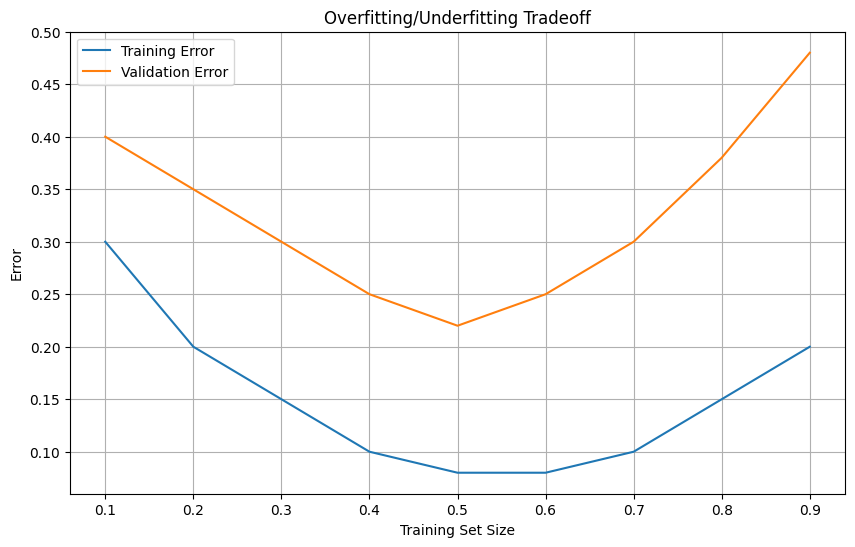

In [ ]:


import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual data)
training_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
training_errors = [0.3, 0.2, 0.15, 0.1, 0.08, 0.08, 0.1, 0.15, 0.2] # Example underfitting
validation_errors = [0.4, 0.35, 0.3, 0.25, 0.22, 0.25, 0.3, 0.38, 0.48] # Example overfitting


plt.figure(figsize=(10, 6))
plt.plot(training_sizes, training_errors, label='Training Error')
plt.plot(training_sizes, validation_errors, label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Overfitting/Underfitting Tradeoff')
plt.legend()
plt.grid(True)
plt.show()